In [10]:
import pandas as pd
from cenpy import products
from geosnap.util.cenpy_fetch import process_columns

note that you need the `product` branch of cenpy...

first we read in a spreadsheet that stores the ACS variable names and the formulas for calculating the varables you need

In [109]:
acsvariables = pd.read_csv('/Users/knaaptime/projects/Fuzzywuzzytest/acsvars.csv')

need to process a couple columns

In [110]:
acsvariables['name'] = acsvariables['name'].str.replace(' ', '_')

In [111]:
acsvariables['calcs'] = acsvariables.apply(lambda x: x['name']+'='+x['formula'], axis=1)

We need to grab all the census codes from the "required variables" column and pass them to Cenpy as a single list of unique values. There's a little utility function in `geosnap` that's designed for this. We use it to pull out the census variables, convert the list to a set (to keep only unique values) then convert back to a list

In [125]:
census_vars = list(set(process_columns(variables['required variables'])))

In [126]:
census_vars

['B17001_001E',
 'B01001_004E',
 'B01001_028E',
 'B01001_001E',
 'B03002_012E',
 'B17001_002E',
 'B01001_005E',
 'B01001_003E',
 'B01001_029E',
 'B01001_030E',
 'B01001_006E',
 'B01001_027E']

In [75]:
sanctuary = pd.read_excel('/Users/knaaptime/projects/Fuzzywuzzytest/California Cities- 2017 Pop.xlsx')

In [65]:
#places = ['Alameda, CA']
time = [2015]

In [114]:
cities = sanctuary.pol1.apply(lambda x: x + ', CA').tolist()

In [127]:
c = products.ACS(2017).from_place('Riverside, CA', level='tract',
                                        variables=census_vars.copy())

Matched: Riverside, CA to Riverside city within layer Incorporated Places


Loop through the 'calcs' column and attach each computed variable as a new column on the df

In [128]:
for i in variables.calcs:
    c.eval(i, inplace=True)

keep only the columns we care about

In [139]:
c = c[acsvariables.name.tolist() + ['geometry', 'GEOID']]
c.columns = c.columns.str.lower()

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


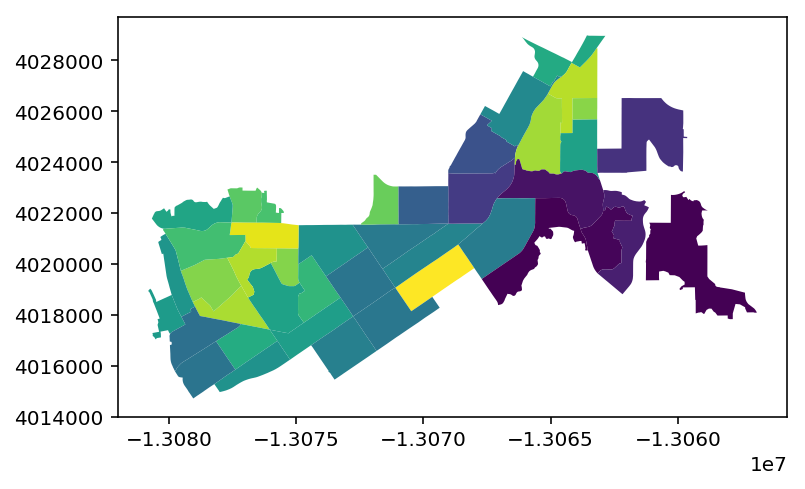

In [141]:
c.plot('percent_latino')

now we just need to loop over all the cities in your table and do the same thing

In [142]:
combined = []

for place in cities:
    try:
        c = products.ACS(2017).from_place(place, level='tract',
                                        variables=census_vars.copy())
        combined.append(c)
    except:
        print(str(place)+' failed')

Matched: Alameda, CA to Alameda city within layer Incorporated Places
Matched: Albany, CA to Albany city within layer Incorporated Places
Matched: Berkeley, CA to Berkeley city within layer Incorporated Places
Matched: Dublin, CA to Dublin city within layer Incorporated Places
Matched: Emeryville, CA to Emeryville city within layer Incorporated Places
Matched: Fremont, CA to Fremont city within layer Incorporated Places
Matched: Hayward, CA to Hayward city within layer Incorporated Places
Matched: Livermore, CA to Livermore city within layer Incorporated Places
Matched: Newark, CA to Newark city within layer Incorporated Places
Matched: Oakland, CA to Oakland city within layer Incorporated Places
Matched: Piedmont, CA to Piedmont city within layer Incorporated Places
Matched: Pleasanton, CA to Pleasanton city within layer Incorporated Places
Matched: San Leandro, CA to San Leandro city within layer Incorporated Places
Matched: Union City, CA to Union City city within layer Incorporated

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/cenpy-1.0.0rc2-py3.6.egg/cenpy/geoparser.py:214: UserWarning: Shape is invalid: 
Ring Self-intersection[-13322952.3215 4400451.9923]
  tell_user('Shape is invalid: \n{}'.format(vexplain))


Matched: Fresno, CA to Fresno city within layer Incorporated Places
Matched: Huron, CA to Huron city within layer Incorporated Places
Matched: Kerman, CA to Kerman city within layer Incorporated Places
Matched: Kingsburg, CA to Kingsburg city within layer Incorporated Places
Matched: Mendota, CA to Mendota city within layer Incorporated Places
Matched: Orange Cove, CA to Orange Cove city within layer Incorporated Places
Matched: Parlier, CA to Parlier city within layer Incorporated Places
Matched: Reedley, CA to Reedley city within layer Incorporated Places
Matched: Sanger, CA to Sanger city within layer Incorporated Places
Matched: San Joaquin, CA to San Joaquin city within layer Incorporated Places
Matched: Selma, CA to Selma city within layer Incorporated Places
Matched: Orland, CA to Orland city within layer Incorporated Places
Matched: Willows, CA to Willows city within layer Incorporated Places
Matched: Arcata, CA to Arcata city within layer Incorporated Places
Matched: Blue Lake

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/cenpy-1.0.0rc2-py3.6.egg/cenpy/geoparser.py:214: UserWarning: Shape is invalid: 
Ring Self-intersection[-13247355.3666 4210108.3541]
  tell_user('Shape is invalid: \n{}'.format(vexplain))


Matched: Bakersfield, CA to Bakersfield city within layer Incorporated Places
Matched: California City, CA to California City city within layer Incorporated Places
Matched: Delano, CA to Delano city within layer Incorporated Places
Matched: Maricopa, CA to Maricopa city within layer Incorporated Places
Matched: McFarland, CA to McFarland city within layer Incorporated Places
Matched: Ridgecrest, CA to Ridgecrest city within layer Incorporated Places
Matched: Shafter, CA to Shafter city within layer Incorporated Places
Matched: Taft, CA to Taft city within layer Incorporated Places
Matched: Tehachapi, CA to Tehachapi city within layer Incorporated Places
Matched: Wasco, CA to Wasco city within layer Incorporated Places
Matched: Avenal, CA to Avenal city within layer Incorporated Places
Matched: Corcoran, CA to Corcoran city within layer Incorporated Places
Matched: Hanford, CA to Hanford city within layer Incorporated Places
Matched: Lemoore, CA to Lemoore city within layer Incorporated

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/cenpy-1.0.0rc2-py3.6.egg/cenpy/geoparser.py:214: UserWarning: Shape is invalid: 
Ring Self-intersection[-13511549.9141 4417833.2625]
  tell_user('Shape is invalid: \n{}'.format(vexplain))


Matched: Hollister, CA to Hollister city within layer Incorporated Places
Matched: San Juan Bautista, CA to San Juan Bautista city within layer Incorporated Places
Matched: Adelanto, CA to Adelanto city within layer Incorporated Places
Matched: Apple Valley, CA to Apple Valley town within layer Incorporated Places
Matched: Barstow, CA to Barstow city within layer Incorporated Places
Matched: Big Bear Lake, CA to Big Bear Lake city within layer Incorporated Places
Matched: Chino, CA to Chino city within layer Incorporated Places
Matched: Chino Hills, CA to Chino Hills city within layer Incorporated Places
Matched: Colton, CA to Colton city within layer Incorporated Places
Matched: Fontana, CA to Fontana city within layer Incorporated Places
Matched: Grand Terrace, CA to Grand Terrace city within layer Incorporated Places
Matched: Hesperia, CA to Hesperia city within layer Incorporated Places
Matched: Highland, CA to Highland city within layer Incorporated Places
Matched: Loma Linda, CA 

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/cenpy-1.0.0rc2-py3.6.egg/cenpy/geoparser.py:214: UserWarning: Shape is invalid: 
Ring Self-intersection[-13574776.0453 4471932.3091]
  tell_user('Shape is invalid: \n{}'.format(vexplain))


Matched: Los Gatos, CA to Los Gatos town within layer Incorporated Places
Matched: Milpitas, CA to Milpitas city within layer Incorporated Places
Matched: Monte Sereno, CA to Monte Sereno city within layer Incorporated Places
Matched: Morgan Hill, CA to Morgan Hill city within layer Incorporated Places
Matched: Mountain View, CA to Mountain View CDP within layer Census Designated Places
Matched: Palo Alto, CA to Palo Alto city within layer Incorporated Places


/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/cenpy-1.0.0rc2-py3.6.egg/cenpy/geoparser.py:214: UserWarning: Shape is invalid: 
Ring Self-intersection[-13575433.7209 4484780.5733]
  tell_user('Shape is invalid: \n{}'.format(vexplain))


Matched: San Jose, CA to San Jose city within layer Incorporated Places
Matched: Santa Clara, CA to Santa Clara city within layer Incorporated Places
Matched: Saratoga, CA to Saratoga city within layer Incorporated Places
Matched: Sunnyvale, CA to Sunnyvale city within layer Incorporated Places
Matched: Capitola, CA to Capitola city within layer Incorporated Places
Matched: Santa Cruz, CA to Santa Cruz city within layer Incorporated Places
Matched: Scotts Valley, CA to Scotts Valley city within layer Incorporated Places
Matched: Watsonville, CA to Watsonville city within layer Incorporated Places
Watsonville, CA failed
Matched: Anderson, CA to Anderson city within layer Incorporated Places
Matched: Redding, CA to Redding city within layer Incorporated Places
Matched: Shasta Lake, CA to Shasta Lake city within layer Incorporated Places
Matched: Loyalton, CA to Loyalton city within layer Incorporated Places
Matched: Dorris, CA to Dorris city within layer Incorporated Places
Matched: Duns

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/cenpy-1.0.0rc2-py3.6.egg/cenpy/geoparser.py:214: UserWarning: Shape is invalid: 
Ring Self-intersection[-13254407.5677 4312677.7065]
  tell_user('Shape is invalid: \n{}'.format(vexplain))


Matched: Porterville, CA to Porterville city within layer Incorporated Places
Matched: Tulare, CA to Tulare city within layer Incorporated Places
Matched: Visalia, CA to Visalia city within layer Incorporated Places
Matched: Woodlake, CA to Woodlake city within layer Incorporated Places
Matched: Sonora, CA to Sonora city within layer Incorporated Places
Matched: Camarillo, CA to Camarillo city within layer Incorporated Places
Matched: Fillmore, CA to Fillmore city within layer Incorporated Places
Matched: Moorpark, CA to Moorpark city within layer Incorporated Places
Matched: Ojai, CA to Ojai city within layer Incorporated Places
Matched: Oxnard, CA to Oxnard city within layer Incorporated Places
Matched: Port Hueneme, CA to Port Hueneme city within layer Incorporated Places
Matched: Santa Paula, CA to Santa Paula city within layer Incorporated Places
Matched: Simi Valley, CA to Simi Valley city within layer Incorporated Places
Matched: Thousand Oaks, CA to Thousand Oaks city within la

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



### checking the results:
- failures:
    - angels camp
    - oceanside
    - eastvale
    - woodland
    - the watsonville failure is erroneous because i accidentally let the connection time out
- jurupa valley matched to squaw valley
- handled rolling hills/rolling hills estates gracefully
- handled Ventura, CA to San Buenaventura (Ventura) gracefully


In [148]:
for i in variables.calcs:
    cities.eval(i, inplace=True) 
cities = cities[acsvariables.name.tolist() + ['geometry', 'GEOID']]
cities.columns = cities.columns.str.lower() 

/Users/knaaptime/anaconda3/envs/scratch/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


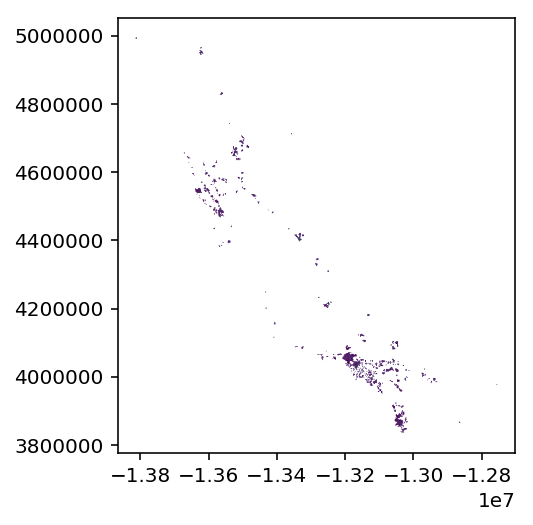

In [149]:
cities.plot('percent_poverty')

now you just need to do that same loop over every time period you need. If you need to add variables, just include them in the `acsvars.csv`

note: [you might want to]( https://nbviewer.jupyter.org/gist/ljwolf/3481aeadf1b0fbb46b72553a08bfc4e6?flush_cache=true) include `strict_within=False`

In [150]:
cities.head()

,percent_foreign_born,percent_poverty,percent_under_18,percent_latino,geometry,geoid
0,0.064110,0.057241,882.0,0.064110,"POLYGON ((-13611801.58 4547206.38, -13611801.5...",06001427800
1,0.124823,0.037434,753.0,0.124823,"POLYGON ((-13610314.24 4546878.54, -13610310.0...",06001427900
2,0.143933,0.129507,794.0,0.143933,"POLYGON ((-13610895.44 4542555, -13610220.28 4...",06001428400
3,0.079631,0.018728,1712.0,0.079631,"POLYGON ((-13610111.86 4542843.29, -13610095.4...",06001428302
4,0.096650,0.052380,1348.0,0.096650,"POLYGON ((-13609181.12 4544044.27, -13609123.0...",06001428200
